In [55]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


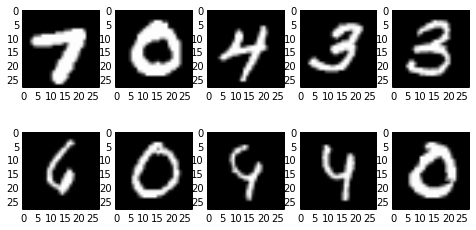

In [56]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (8.0, 4.0)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(mnist.train.images[randint(0,1000)].reshape((28,28)), cmap="gray")

In [57]:
nHidden = 250
#Probar con 100

x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W0 = tf.Variable(tf.random_normal([784, nHidden],stddev=0.01))
b0 = tf.Variable(tf.random_normal([nHidden],stddev=0.01))

W1 = tf.Variable(tf.random_normal([nHidden, 10],stddev=0.01))
b1 = tf.Variable(tf.random_normal([10],stddev=0.01))

h = tf.nn.tanh(tf.matmul(x, W0) + b0)
y = tf.nn.tanh(tf.matmul(h, W1) + b1)


mse_loss = tf.reduce_mean(tf.square(y_-y))
train_step = tf.train.AdamOptimizer(0.005).minimize(mse_loss)



init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


testPerformance = []
trainPerformance = []

for i in range(80):
    batch_xs, batch_ys = mnist.train.next_batch(500)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    trainPerformance.append(sess.run(mse_loss,feed_dict={x: batch_xs, y_: batch_ys}))
    testPerformance.append(sess.run(mse_loss,feed_dict={x: mnist.test.images, y_: mnist.test.labels}))




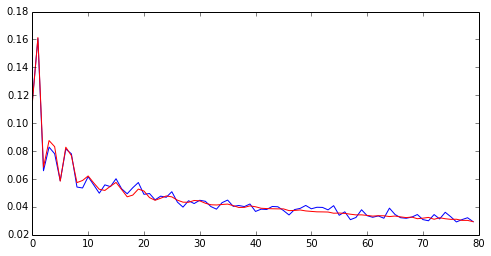

In [58]:
plt.plot(trainPerformance, "b")
plt.plot(testPerformance, "r")
plt.show()

In [59]:
pred = np.argmax(sess.run(y, feed_dict={x: mnist.test.images, y_: mnist.test.labels}),axis=1)
trueLabels = np.argmax(mnist.test.labels,axis=1)

print trueLabels.shape
print pred.shape

errors = 0.

for i in range(len(trueLabels)):
    if trueLabels[i] != pred[i]:
        errors = errors+1
        
print "Error on test set: "+str(errors/pred.shape[0])

(10000,)
(10000,)
Error on test set: 0.1034


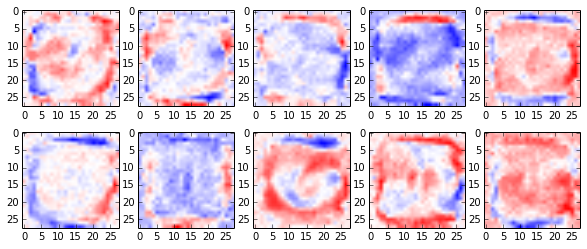

In [60]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

fW = sess.run(W0)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(fW[:,randint(0,nHidden)]).reshape((28,28)), cmap="bwr")